In [1]:
import importlib.util

package_name = 'trimesh'
spec = importlib.util.find_spec(package_name)
if spec is None:
    print(package_name +" is not installed")
    !pip install trimesh
else:
    print(package_name +" is installed")

trimesh is installed


In [2]:
package_name = 'mahotas'
spec = importlib.util.find_spec(package_name)
if spec is None:
    print(package_name +" is not installed")
    !pip install mahotas
else:
    print(package_name +" is installed")

mahotas is installed


In [3]:
import numpy as np
import math
import cv2
import os
import pandas as pd
import mahotas
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage.measure import regionprops
from skimage.transform import rescale, resize
from skimage.morphology import thin
from skimage.morphology import skeletonize
from skimage.morphology import medial_axis
from matplotlib.ticker import MultipleLocator
from utils import dataset_loader, my_utils, Operations, Moments, generate_point_cloud
import warnings
warnings.filterwarnings('ignore')

from plyfile import PlyData, PlyElement

In [4]:
%matplotlib inline

In [6]:
colors = ['g', 'b', 'k', 'y', 'm', 'c']
for inx, surf in enumerate(surfaces):
    if inx == 0:
        sample_inx = 3
    elif inx == 1:
        sample_inx = 9
    else:
        sample_inx = 1
    file = os.path.join(DATA_DIR,surf+'-loc-'+str(sample_inx)+'.txt')
#         info_file = os.path.join(DATA_DIR,"sample_"+str(sample_index)+"info"+str(tmp_index)+'.3d')
    print(file)
#         print(info_file)
    DATA = np.loadtxt(file, delimiter=",")
#         DATA = pd.read_csv(file, delimiter = "\t", header=None)
#         INFO = pd.read_csv(info_file, delimiter = "\t", header=None)
#         print(DATA)
    DATA = DATA.astype(np.float)
    DATA = norm_points(DATA, do_normalize)
#         INFO = INFO.to_numpy()
#         print(DATA)
        # print(INFO)
#         DATA  = DATA  * (INFO[1,:]-INFO[2,:]) + INFO[2,:]+ INFO[0,:];
#         DATA = DATA[:,:3]#only extract the location information

    dataset_dict[surf] = DATA
    points = DATA
    #     print(dataset_dict)

    mue            = np.mean(DATA, axis=0)
    fig = plt.figure(figsize=(25,5))
    ax1 = fig.add_subplot(1, sample_per_class, 1, projection="3d")
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], s=5, c=colors[1],marker="s", facecolor="red", lw=0, alpha=1)
    ax1.scatter(mue[0], mue[1], mue[2], s=100, c='r', marker="*")
    ax1.set_xlabel('x / nm')
    ax1.set_ylabel('y / nm')
    ax1.set_zlabel('z / nm')
    ax1.set_xlim((-500,500))
    ax1.set_ylim((-500,500))
    ax1.set_zlim((-500,500))
    #ax1.set_title('Normalized PC '+temp_C+'-Sample '+str(sample_index))
    plt.show()
    
    fig.savefig('/home/students/yiwei/Documents/dataset/3d-'+surf+'.pdf', bbox_inches='tight')
    

NameError: name 'surfaces' is not defined

In [ ]:
# DATA_DIR    = "/home/students/yiwei/Documents/PAINT_DiffTemp/Core-shell"
# temperature = 21
# available_temperature = [21, 33, 35, 38, 43, 53]


In [ ]:
# DATA_DIR    = "/home/students/yiwei/Documents/PAINT_DiffTemp/toy_example/results/results_mtemp"

In [ ]:
# temp_C = str(temperature)+'C'
# sample_index = 15
# index_3d = str(sample_index)+".3d"
# file = os.path.join(DATA_DIR,temp_C,"Microgel_plotter_v2_solvatochromism",index_3d)
# print(file)

# DATA = pd.read_csv(file, delimiter = "\t", header=None)
# DATA = DATA.to_numpy()[:,:3]#only extract the location information
# DATA[:,2] = 1-DATA[:,2]
# # print(type(DATA))

In [ ]:
# ply_type = ['go','gg']
# index = 1
# file = os.path.join(DATA_DIR,ply_type[1]+str(index)+'.3d')
# info_file = os.path.join(DATA_DIR,'info'+str(index)+'.3d')
# print(file)
# print(info_file)

# DATA = pd.read_csv(file, delimiter = "\t", header=None)
# INFO = pd.read_csv(info_file, delimiter = "\t", header=None)
# DATA = DATA.to_numpy()
# INFO = INFO.to_numpy()
# # print(DATA)
# # print(INFO)
# DATA  = DATA  * (INFO[1,:]-INFO[2,:]) + INFO[2,:]+ INFO[0,:];
# DATA = DATA[:,:3]#only extract the location information
# # pcd = PlyData.read(file)

# Visualize the data in linux server

In [5]:
def calc_mue(M):
    """
     Args:
         M: point cloud
    returns mean of a point cloud
    """
    return np.mean(M, axis=0)

def calc_dist(p, mue): 
    """    
    At first, minus mue from point clouds, then calculate square 2 of them
     Args:
         p:   point cloud
         mue: mean of point cloud
    
    returns: calculated distance
    """
    return np.linalg.norm(p-mue, 2)

def norm_points(DATA, do_normalize):
    processed_points = []      
    points  = DATA
    confidence = 0.99

    if do_normalize:
        Inlaier_points = []
        mue            = calc_mue(points)# cal mean of a point cloud
    #     print(mue.shape)
    #     print('mue', mue)
        sorted_dists   = sorted([calc_dist(p, mue) for p in points])
        XY             = [(0, 0)]
        t              = len(sorted_dists)
        for j, d in enumerate(sorted_dists):
            XY.append(( d, 1.*j/t ))
            if 1.*j/t >= confidence:
                break
        sorted_idx     = sorted([(i, my_utils.calc_dist(p, mue)) for i, p in enumerate(points)], key= lambda d:(d[1], d[0]))
        inlaier        = [d[0] for d in sorted_idx[:j]]
        inlaier_points = [points[j] for j in inlaier]
        points         = np.array(inlaier_points)
    #     print(points.shape)
        points        -= mue
    
    return points

/home/students/yiwei/Documents/dataset/FOCTS-loc-3.txt


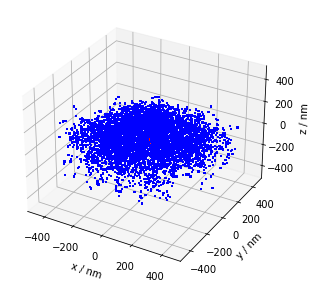

/home/students/yiwei/Documents/dataset/ODS-loc-9.txt


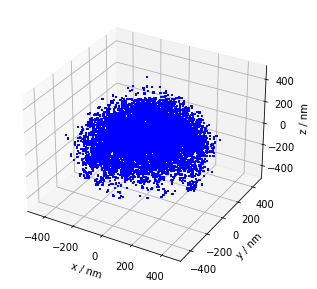

/home/students/yiwei/Documents/dataset/PEG-loc-1.txt


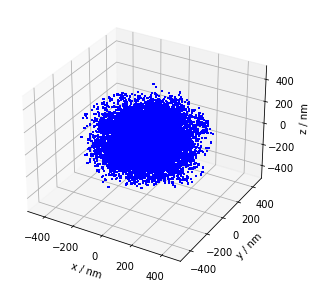

In [6]:
dataset_dict = {}
surfaces = ['FOCTS','ODS','PEG']
do_normalize = True
DATA_DIR = "/home/students/yiwei/Documents/dataset"
sample_per_class = 1


colors = ['g', 'b', 'k', 'y', 'm', 'c']
for inx, surf in enumerate(surfaces):
    if inx == 0:
        sample_inx = 3
    elif inx == 1:
        sample_inx = 9
    else:
        sample_inx = 1
    file = os.path.join(DATA_DIR,surf+'-loc-'+str(sample_inx)+'.txt')
#         info_file = os.path.join(DATA_DIR,"sample_"+str(sample_index)+"info"+str(tmp_index)+'.3d')
    print(file)
#         print(info_file)
    DATA = np.loadtxt(file, delimiter=",")
#         DATA = pd.read_csv(file, delimiter = "\t", header=None)
#         INFO = pd.read_csv(info_file, delimiter = "\t", header=None)
#         print(DATA)
    DATA = DATA.astype(np.float)
    DATA = norm_points(DATA, do_normalize)
#         INFO = INFO.to_numpy()
#         print(DATA)
        # print(INFO)
#         DATA  = DATA  * (INFO[1,:]-INFO[2,:]) + INFO[2,:]+ INFO[0,:];
#         DATA = DATA[:,:3]#only extract the location information

    dataset_dict[surf] = DATA
    points = DATA
    #     print(dataset_dict)

    mue            = np.mean(DATA, axis=0)
    fig = plt.figure(figsize=(25,5))
    ax1 = fig.add_subplot(1, sample_per_class, 1, projection="3d")
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], s=5, c=colors[1],marker="s", facecolor="red", lw=0, alpha=1)
    ax1.scatter(mue[0], mue[1], mue[2], s=100, c='r', marker="*")
    ax1.set_xlabel('x / nm')
    ax1.set_ylabel('y / nm')
    ax1.set_zlabel('z / nm')
    ax1.set_xlim((-500,500))
    ax1.set_ylim((-500,500))
    ax1.set_zlim((-500,500))
    #ax1.set_title('Normalized PC '+temp_C+'-Sample '+str(sample_index))
    plt.show()
    
    fig.savefig('/home/students/yiwei/Documents/dataset/3d-'+surf+'.pdf', bbox_inches='tight')
    
    
#     dataset_list = []
#     dataset_list.append(dataset_dict[surfaces[0]])
#     dataset_list.append(dataset_dict[surfaces[1]])
#     dataset_list.append(dataset_dict[surfaces[2]])

    


In [ ]:
# Refine PC
sample_per_class = 1
confidence = 0.99
colors = ['g', 'b', 'k', 'y', 'm', 'c']
do_normalize = True

processed_points = []      
points  = DATA
# print(type(DATA))
# print(type(points))
# print('points',points )
fig = plt.figure(figsize=(25,5))
if do_normalize:
    Inlaier_points = []
    mue            = my_utils.calc_mue(points)# cal mean of a point cloud
#     print(mue.shape)
#     print('mue', mue)
    sorted_dists   = sorted([my_utils.calc_dist(p, mue) for p in points])
    XY             = [(0, 0)]
    t              = len(sorted_dists)
    for j, d in enumerate(sorted_dists):
        XY.append(( d, 1.*j/t ))
        if 1.*j/t >= confidence:
            break
    sorted_idx     = sorted([(i, my_utils.calc_dist(p, mue)) for i, p in enumerate(points)], key= lambda d:(d[1], d[0]))
    inlaier        = [d[0] for d in sorted_idx[:j]]
    inlaier_points = [points[j] for j in inlaier]
    points         = np.array(inlaier_points)
#     print(points.shape)
    points        -= mue
   
    DATA = points
    mue            = np.mean(points, axis=0)
   
    ax1        = fig.add_subplot(1, sample_per_class, 1, projection="3d")
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], s=5, c=colors[1],marker="s", facecolor="red", lw=0, alpha=1)
    ax1.scatter(mue[0], mue[1], mue[2], s=100, c='r', marker="*")
    ax1.set_xlabel('x / nm')
    ax1.set_ylabel('y / nm')
    ax1.set_zlabel('z / nm')
    ax1.set_xlim((-300,300))
    ax1.set_ylim((-300,300))
    ax1.set_zlim((-300,300))
    #ax1.set_title('Normalized PC '+temp_C+'-Sample '+str(sample_index))
    plt.show()
    
# fig.savefig(temp_C+ '_'+str(sample_index) + '_3d.pdf', bbox_inches='tight')
fig.savefig(ply_type[1]+str(index) + '_3d.pdf', bbox_inches='tight')

In [7]:
surface          = []
Centralized      = True
sample_per_class = 1
colors           = ['g','b','k','y','m','c']
set_axis_limit   = False


/home/students/yiwei/Documents/dataset/FOCTS-loc-3.txt
/home/students/yiwei/Documents/dataset/ODS-loc-9.txt
/home/students/yiwei/Documents/dataset/PEG-loc-1.txt


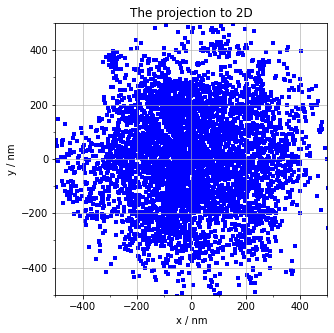

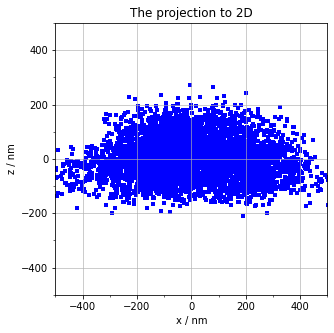

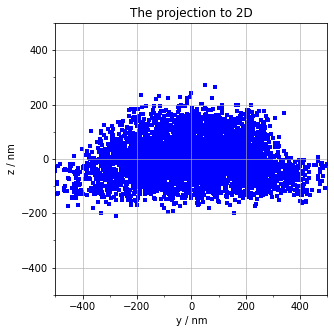

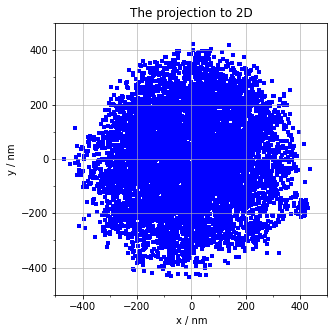

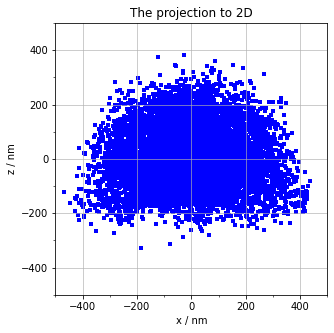

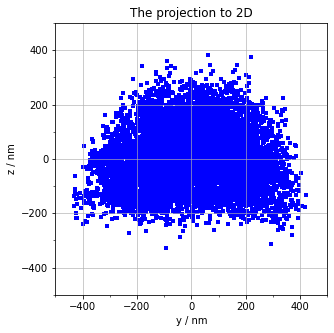

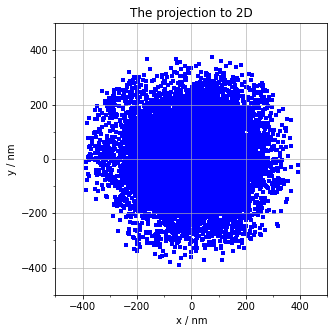

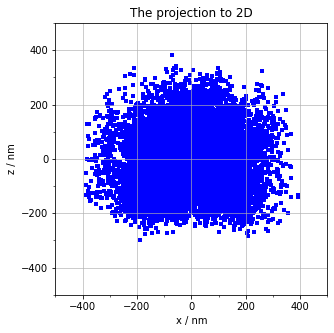

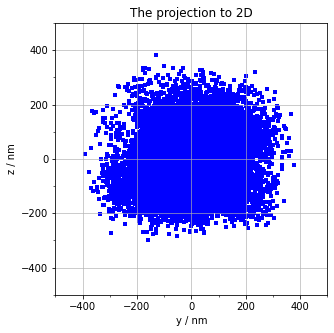

In [9]:
from matplotlib.ticker import MultipleLocator
sample_per_class = 1
CLASS_Plane = ['YZ Plane','XZ Plane','XY Plane']
N           = sample_per_class
dim         = 0
Descriptors = []

dataset_dict = {}
surfaces = ['FOCTS','ODS','PEG']
do_normalize = True
DATA_DIR = "/home/students/yiwei/Documents/dataset"


Centralized = True
colors = ['g', 'b', 'k', 'y', 'm', 'c']
for inx, surf in enumerate(surfaces):
    if inx == 0:
        sample_inx = 3
    elif inx == 1:
        sample_inx = 9
    else:
        sample_inx = 1
    file = os.path.join(DATA_DIR,surf+'-loc-'+str(sample_inx)+'.txt')
#         info_file = os.path.join(DATA_DIR,"sample_"+str(sample_index)+"info"+str(tmp_index)+'.3d')
    print(file)
#         print(info_file)
    DATA = np.loadtxt(file, delimiter=",")
#         DATA = pd.read_csv(file, delimiter = "\t", header=None)
#         INFO = pd.read_csv(info_file, delimiter = "\t", header=None)
#         print(DATA)
    DATA = DATA.astype(np.float)
    DATA = norm_points(DATA, do_normalize)
#         INFO = INFO.to_numpy()
#         print(DATA)
        # print(INFO)
#         DATA  = DATA  * (INFO[1,:]-INFO[2,:]) + INFO[2,:]+ INFO[0,:];
#         DATA = DATA[:,:3]#only extract the location information

    dataset_dict[surf] = DATA
    points = DATA  
    dim = 0
    while(dim<3):
        fig = plt.figure(figsize=(25,5))
        for idx in range(sample_per_class):
            points = points
            ax1    = fig.add_subplot(1, 3, idx+1)
            if(dim==0):
                x=points[:,0]
                ax1.set_xlabel('x / nm')
                y=points[:,1]
                ax1.set_ylabel('y / nm')
            elif(dim==1):
                x=points[:,0]
                ax1.set_xlabel('x / nm')
                y=points[:,2]
                ax1.set_ylabel('z / nm')
            elif(dim==2):
                x=points[:,1]
                ax1.set_xlabel('y / nm')
                y=points[:,2]            
                ax1.set_ylabel('z / nm')
            ax1 = fig.add_subplot(1, 3, idx+1)

            spacing = 100 # This can be your user specified spacing. 
            minorLocator = MultipleLocator(spacing)
            # Set minor tick locations.
            ax1.yaxis.set_minor_locator(minorLocator)
            ax1.xaxis.set_minor_locator(minorLocator)
            # Set grid to use minor tick locations. 
            ax1.grid(which = 'minor')
            ax1.set_aspect('equal', 'box')

            ax1.scatter(x, y, s= 20, c=colors[1], marker="s", facecolor="red", lw=0, alpha=1.)
            if(Centralized):
                ax1.set_xlim((-500,500))
                ax1.set_ylim((-500,500))
    #             if dim == 0:
    #                 circle2 = plt.Circle((0, 0), 120, color='k', fill=False,linewidth=5)
    #                 ax1.add_patch(circle2)
            ax1.grid(which='minor', alpha=0.2)
            ax1.grid(which='major', alpha=0.8)
            ax1.set_title('The projection to 2D')
            fig.savefig('/home/students/yiwei/Documents/dataset/2d_'+str(dim) + surf+'.pdf', bbox_inches='tight')
    #     fig.savefig(temp_C+ '_'+str(dim) + '_2d.pdf', bbox_inches='tight')
    #         fig.savefig(ply_type[1]+str(index)+ '_dim_'+str(dim) + '_2d.pdf', bbox_inches='tight')

        dim=dim+1
#         if dim == 3:
#             dim=0
